In [1]:
# ignora avisos
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob         
import numpy as np
import seaborn as sb
from os import listdir
from os.path import isfile, join
import matplotlib.ticker as mticker
from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [2]:
mes = {
    '01': 'JANEIRO',
    '02': 'FEVEREIRO',
    '03': 'MARÇO',
    '04': 'ABRIL',
    '05': 'MAIO',
    '06': 'JUNHO',
    '07': 'JULHO',
    '08': 'AGOSTO',
    '09': 'SETEMBRO',
    '10': 'OUTUBRO',
    '11': 'NOVEMBRO',
    '12': 'DEZEMBRO'
}

param = 'sexo'

sexo_dic = {
    1: 'Homem',
    3: 'Mulher'
}

In [3]:
# carrega arquivo em dafaframe / exclui NaNs
def loadDataFrame(file):
    df = pd.read_csv(file, sep=';')
    df.dropna(inplace = True)
    return df


# prepara dataframe considerando apenas cidades coberteas pela Rede Vanguarda
# ['APARECIDA', 'ARAPEÍ', 'AREIAS', 'ATIBAIA', 'BANANAL', 'BOM JESUS DOS PERDÕES', 
#  'BRAGANÇA PAULISTA', 'CAÇAPAVA', 'CACHOEIRA PAULISTA', 'CAMPOS DO JORDÃO', 'CANAS', 
#  'CARAGUATATUBA', 'CRUZEIRO', 'CUNHA', 'GUARATINGUETÁ', 'IGARATÁ', 'ILHABELA', 'JACAREÍ', 
#  'JAMBEIRO', 'JOANÓPOLIS', 'LAGOINHA', 'LAVRINHAS', 'LORENA', 'MONTEIRO LOBATO', 
#  'NATIVIDADE DA SERRA', 'NAZARÉ PAULISTA', 'PARAIBUNA', 'PINDAMONHANGABA', 'PIQUETE', 
#  'PIRACAIA', 'POTIM', 'QUELUZ', 'REDENÇÃO DA SERRA', 'ROSEIRA', 'SANTA BRANCA', 
#  'SANTO ANTÔNIO DO PINHAL', 'SÃO BENTO DO SAPUCAÍ', 'SÃO JOSÉ DO BARREIRO', 
#  'SÃO JOSÉ DOS CAMPOS', 'SÃO LUÍS DO PARAITINGA', 'SÃO SEBASTIÃO', 'SILVEIRAS', 'TAUBATÉ', 
#  'TREMEMBÉ', 'UBATUBA', 'VARGEM'] 
def prepareDataframe (df, parameter, parameter_dic):
    # exclui colunas irrelevantes
    df = df[['saldomovimentação', parameter, 'município']]
    # substitui magic numbers
    df['saldomovimentação'] = df['saldomovimentação'].map({1: 'Admissões', -1: 'Demissões'})
    df[parameter] = df[parameter].map(parameter_dic)
    vanguarda = df[df['município'].isin([350250, 350315, 350350, 350410, 350490, 350710, 350760, 350850, 
                                         350860, 350970, 350995, 351050, 351340, 351360, 351840, 352020, 
                                         352040, 352440, 352490, 352550, 352630, 352660, 352720, 353170, 
                                         353230, 353240, 353560, 353800, 353850, 353860, 354075, 354190, 
                                         354230, 354430, 354600, 354820, 354860, 354960, 354990, 355000, 
                                         355070, 355200, 355410, 355480, 355540, 355635])]
    return vanguarda

# gera gráficos
def generateChart(df, parameter, competencia, requisito):
    ax = pd.pivot_table(
        df,
        columns=df['saldomovimentação'],
        index=df[parameter],
        values=parameter,
        aggfunc='count',
        fill_value=0
    ).sort_values(by='Admissões',ascending=True
    ).plot.bar(
        figsize = (10,6),
        color=['#2f4b7c','#f95d6a'],
        xlabel= requisito.title()
    )
    # configuração do gráfico
    ax.legend(bbox_to_anchor=(1, 0), loc='lower right')
    ax.ticklabel_format(axis='y',style='plain', )
    plt.xticks(rotation=0)
    # insere thousand separator
    ax.get_yaxis().set_major_formatter(
        mpl.ticker.FuncFormatter(
        lambda x, p: format(int(x), ',')))
    ax.set_title("PESSOAS ADMITIDAS E DEMITIDAS POR " + requisito.upper() + " EM "+ competencia)

In [4]:
# verificar arquivos com o padrão CAGEDMOV no diretorio
diretorio = "/Users/mariaclara1985/Documents/3_fatec_bd/6SEM/bd-n-estruturado/novocaged"
arquivos = [f for f in listdir(diretorio) if isfile(join(diretorio, f)) and 'CAGEDMOV' in f]
arquivos.sort()

# 1 – Qual foi o índice de pessoas empregadas e desempregadas em certo período, categorizadas por:


## - Gênero

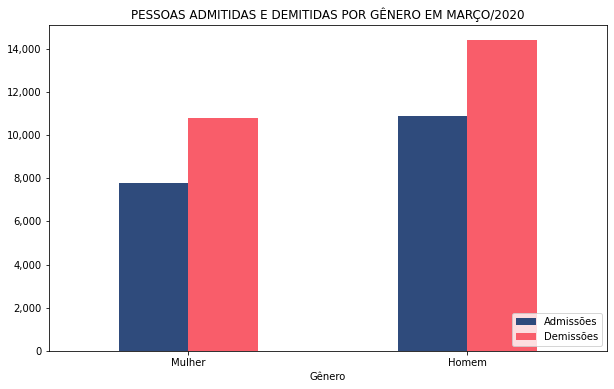

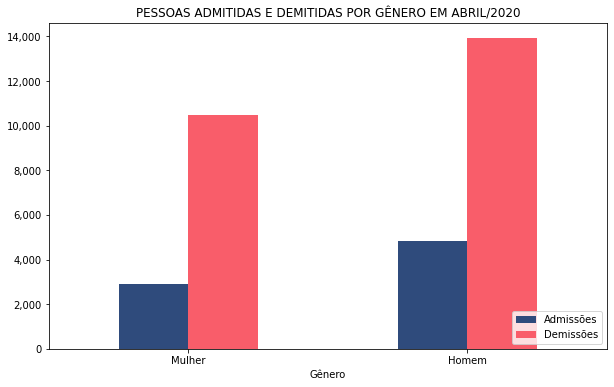

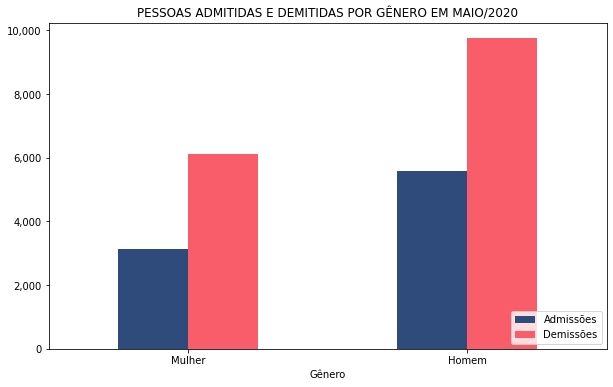

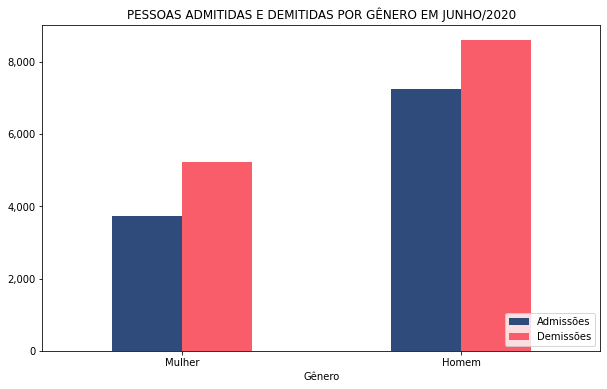

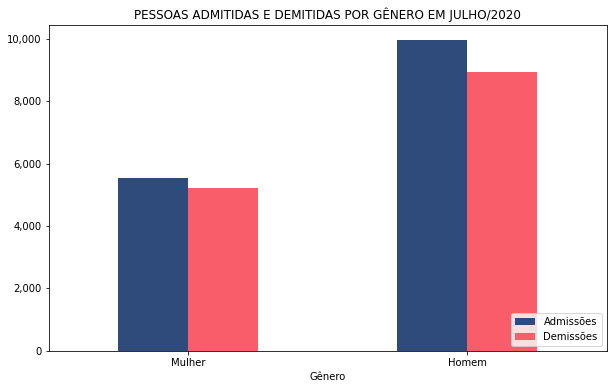

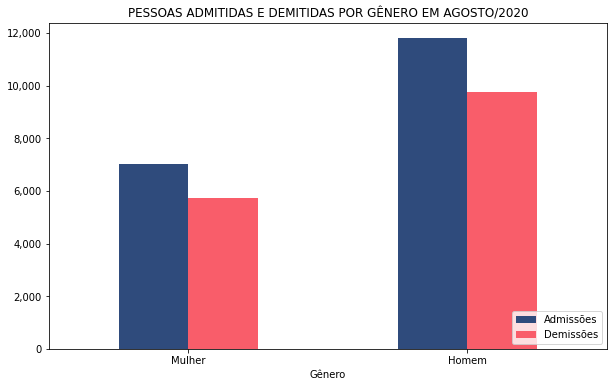

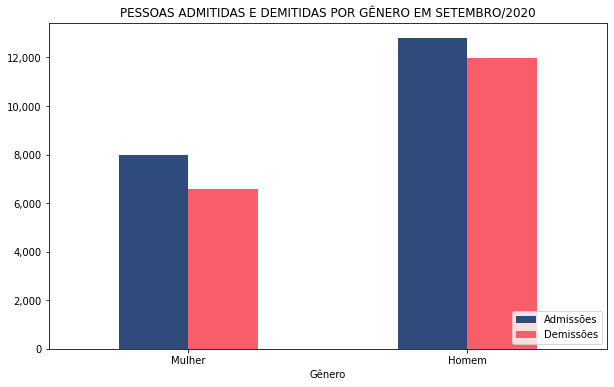

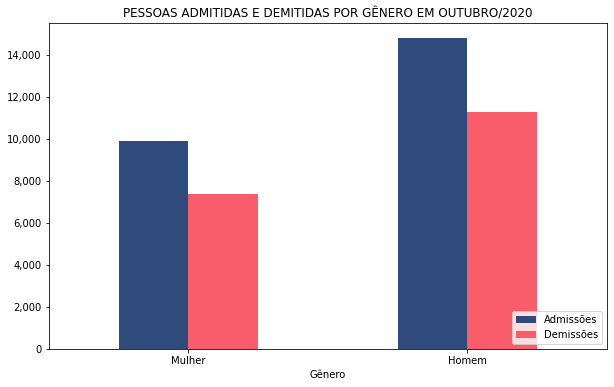

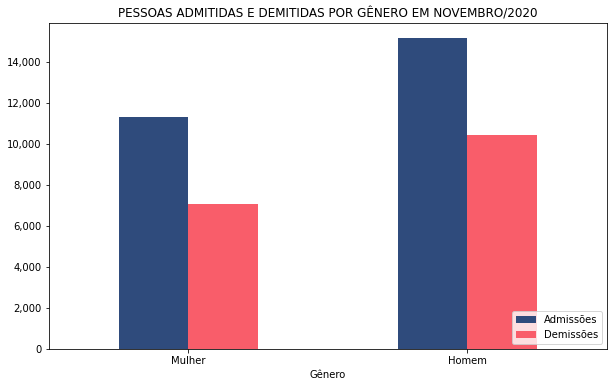

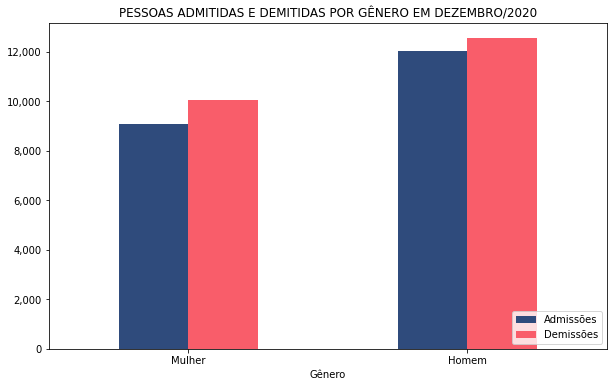

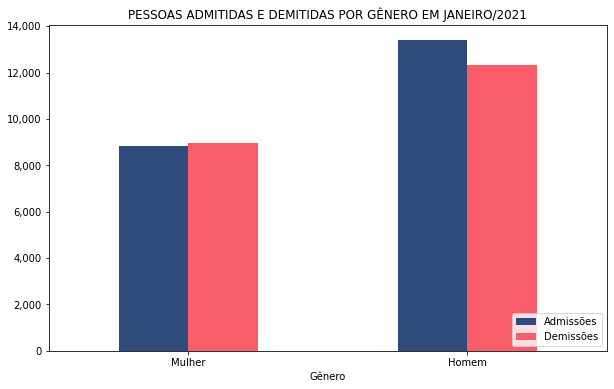

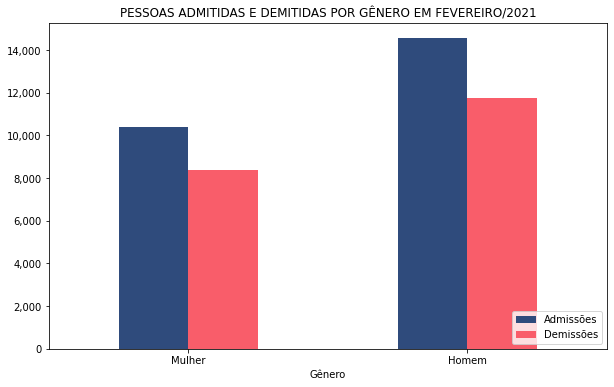

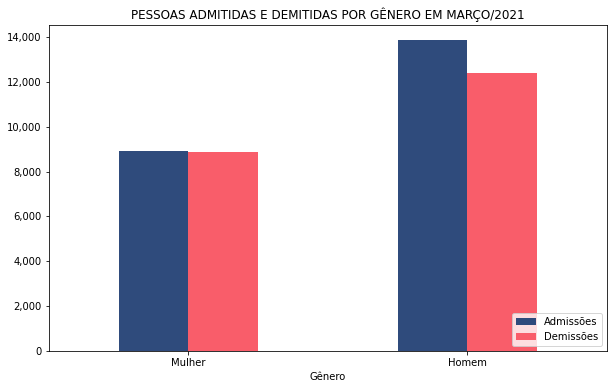

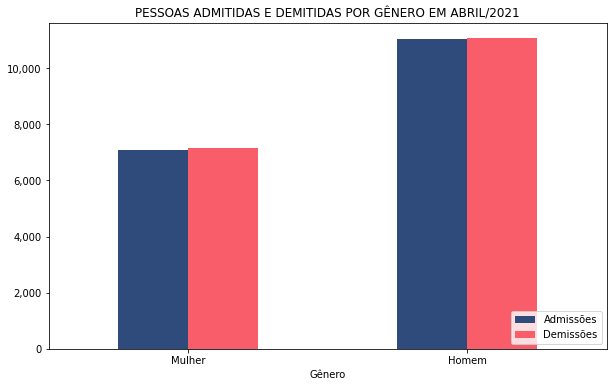

In [5]:
# cria gráficos para cada mês, de março/2020 a abril/2021

for arquivo in arquivos:
    pandemia_df = loadDataFrame(arquivo)
    questao01e_df = prepareDataframe(pandemia_df, param, sexo_dic)
    competencia = mes[str(arquivo)[12:-4]] + "/"+ str(arquivo)[8:-6]
    generateChart(questao01e_df, param, competencia, "gênero")